# 盲反卷积复原图像

In [13]:
import numpy as np
import cv2
from skimage import io,color, img_as_ubyte
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2


In [2]:
def flip180(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    return new_arr

def RL_deconvblind(img,psf,iterations):
    img = img.astype(np.float64)
    psf = psf.astype(np.float64)
    init_img = img
    psf_hat = flip180(psf)
    for i in range(iterations):
        est_conv = conv2(init_img,psf,'same')
        relative_blur = img / est_conv
        error_est = conv2(relative_blur,psf_hat, 'same')
        init_img = init_img * error_est
    return np.uint8(normal(init_img))

def fspecial_Gaussian(KernelWH,sigma):
    r, c = KernelWH
    return np.multiply(cv2.getGaussianKernel(r, sigma), (cv2.getGaussianKernel(c, sigma)).T)

def bluredImg(src):
    GausBlurImg = cv2.GaussianBlur(src,(7 ,7), 3)
    return GausBlurImg

def normal(array):
    array = np.where(array < 0,  0, array)
    array = np.where(array > 255, 255, array)
    array = array.astype(np.int16)
    return array

/Users/lixm/anaconda3/envs/dip/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 329.5, 325.5, -0.5)

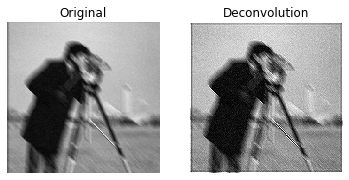

In [17]:
img = io.imread('images/mohu.png')
org_r = img[:,:,0]
org_g = img[:,:,1]
org_b = img[:,:,2]

iterations = 60    #迭代次数
psf = fspecial_Gaussian((5, 5), 1)
out_r = RL_deconvblind(org_r, psf, iterations)
out_g = RL_deconvblind(org_g, psf, iterations)
out_b = RL_deconvblind(org_b, psf, iterations)
out = np.dstack((out_r,out_g,out_b))

grey = img_as_ubyte(color.rgb2gray(img))
gray = RL_deconvblind(grey, psf, iterations)

plt.subplot(121)
plt.imshow(img,plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(out,plt.cm.gray)
plt.title('Deconvolution')
plt.axis('off')

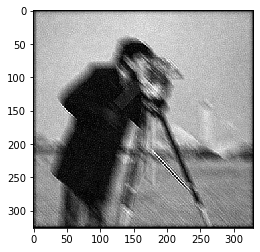

In [15]:
plt.imshow(gray)